In [17]:
import json

import matplotlib.pyplot as plt
import numpy as np
from binance import Client
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

In [18]:
try:
    with open('secrets.json') as f:
        secrets = json.load(f)
except Exception as e:
    print('Error: ', e)


client = Client(secrets['apiKey'], secrets['secretKey'])

In [19]:
historical = client.get_historical_klines('BTCEUR', Client.KLINE_INTERVAL_1HOUR, '12 Nov 2024')

close_values = [kline[4] for kline in historical]
data = np.array(close_values, dtype=np.float64).reshape(-1, 1)


scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [20]:
def create_dataset(data, look_back=10):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


look_back = 8
X, y = create_dataset(data_scaled, look_back)

X = X.reshape(X.shape[0], X.shape[1], 1)

In [21]:
train_size = int(len(X) * 0.70)
test_size = len(X) - train_size
train_size, test_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [22]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(100))
model.add(Dense(1))

c:\Users\rares\code\DataMining\NeuralNetworks\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1998
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0261 
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0108 
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 
Epoch 9/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 
Epoch 10/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 
Epoch 11/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 
Epoch 12/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 
Epoch 13/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 
Epoch 14/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 
Epoch 15/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 
Epoch

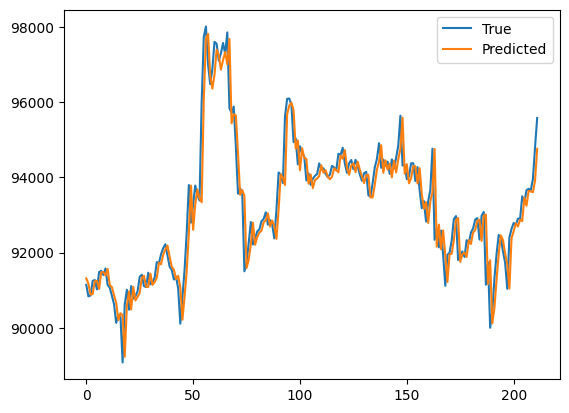

MAE:  419.17348024764146
MSE:  364162.80829880614
RMSE:  603.4590361398245


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, verbose=1)


predictions = model.predict(X_test)

predictions_rescaled = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot(y_test_rescaled, label='True')
plt.plot(predictions_rescaled, label='Predicted')
plt.legend()
plt.show()

mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)


In [26]:
next_hour = model.predict(X[-1:])
next_hour_rescaled = scaler.inverse_transform(next_hour.reshape(-1, 1))
print('Close ora curentă: ', next_hour_rescaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Close ora curentă:  [[94756.99]]
